In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
import sklearn.utils

import sys
sys.path.insert(1, '../modules')
import data
import display

The model that works the best, both with using "easy" negatives and "hard" negatives, is the Logistic Regression model combined with a reduction to 64 dimensions through PCA.

In [2]:
pca = sklearnPCA(64)
model = LogisticRegression(class_weight='balanced', C=8.0)

In [3]:
with open('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/X_easy.pickle', "rb") as f:
       X_easy = pickle.load(f)

In [4]:
with open('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/y_easy.pickle', "rb") as f:
       y_easy = pickle.load(f)

In [5]:
with open('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/days_with_easy_negatives.pickle', "rb") as f:
       days_with_easy_negatives = pickle.load(f)

In [6]:
with open('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/rms_with_easy_negatives.pickle', "rb") as f:
       rms_with_easy_negatives = pickle.load(f)

The function used can be found in the modules folder. The data used in the model consists of only positives and easy negatives (audio samples that are trucks, and audio samples that are clearly not trucks). The model does fairly well with this dataset, although not extremely well. You might notice that some days have only samples that are supposed to be positive, and some days have samples that are supposed to be negative. This is because the data input into the model only has easy negatives on some days (which is also why the cross-validation doesn't split by day). 
The RMS graphs both show the same data, just presented differently. Both graphs show that overall, the RMS doesn't really change based on what label a sample is assigned.

clf score:  0.7476174496644294
precision, recall, f score:  (0.7453451256816066, 0.7476174496644294, 0.7463638640728061, None)


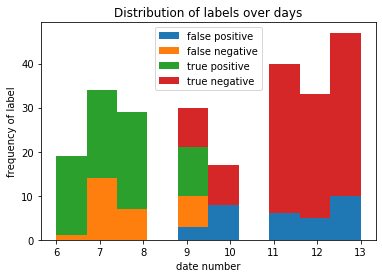

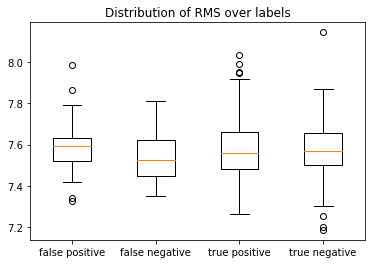

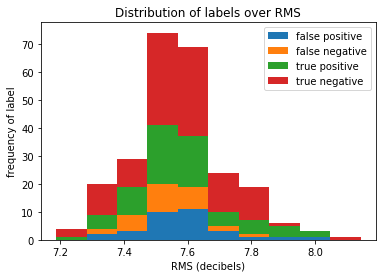

clf score:  0.6958944890612019
precision, recall, f score:  (0.6854193971166448, 0.6958944890612019, 0.6871702095582692, None)


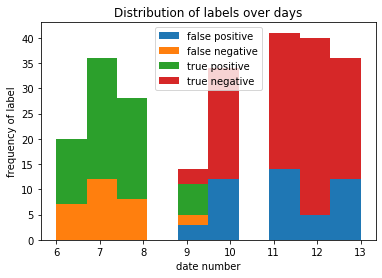

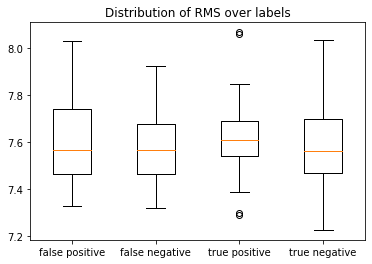

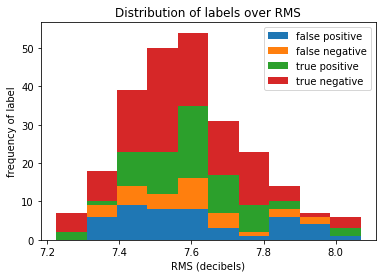

clf score:  0.742241968557758
precision, recall, f score:  (0.7370885737222371, 0.742241968557758, 0.739187728071361, None)


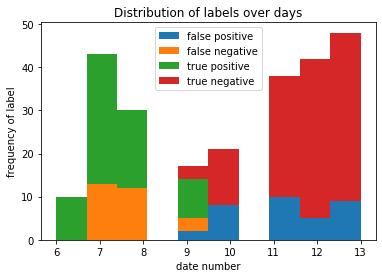

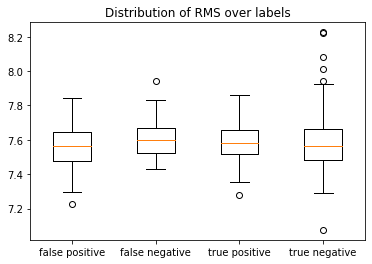

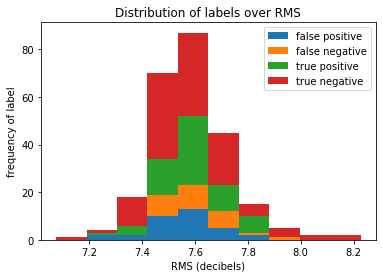

clf score:  0.7563352826510722
precision, recall, f score:  (0.7545489740611692, 0.7563352826510721, 0.7544497793297443, None)


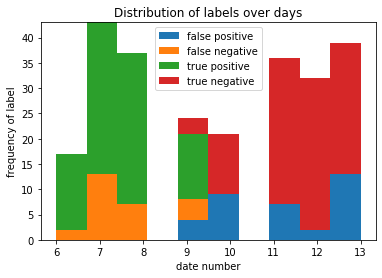

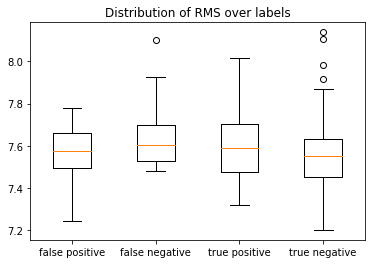

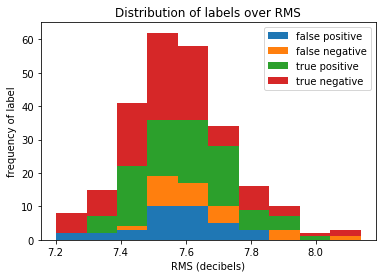

clf score:  0.7472108044627129
precision, recall, f score:  (0.7464871194379391, 0.7472108044627128, 0.7458644415166155, None)


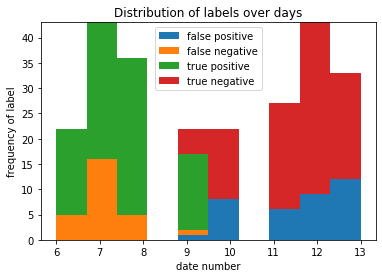

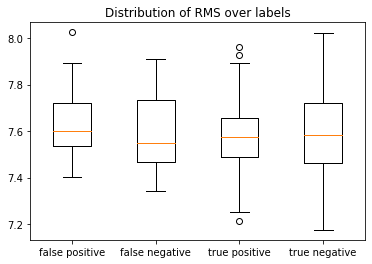

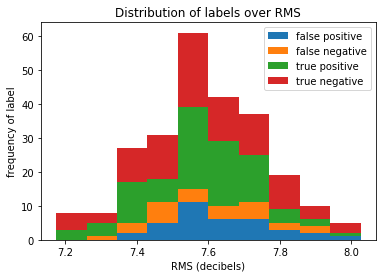

In [7]:
display.predict_truck_graph\
(X_easy, y_easy, None, pca, model, KFold(shuffle=True), days_with_easy_negatives, rms_with_easy_negatives)